In [1]:
import cv2
import math
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

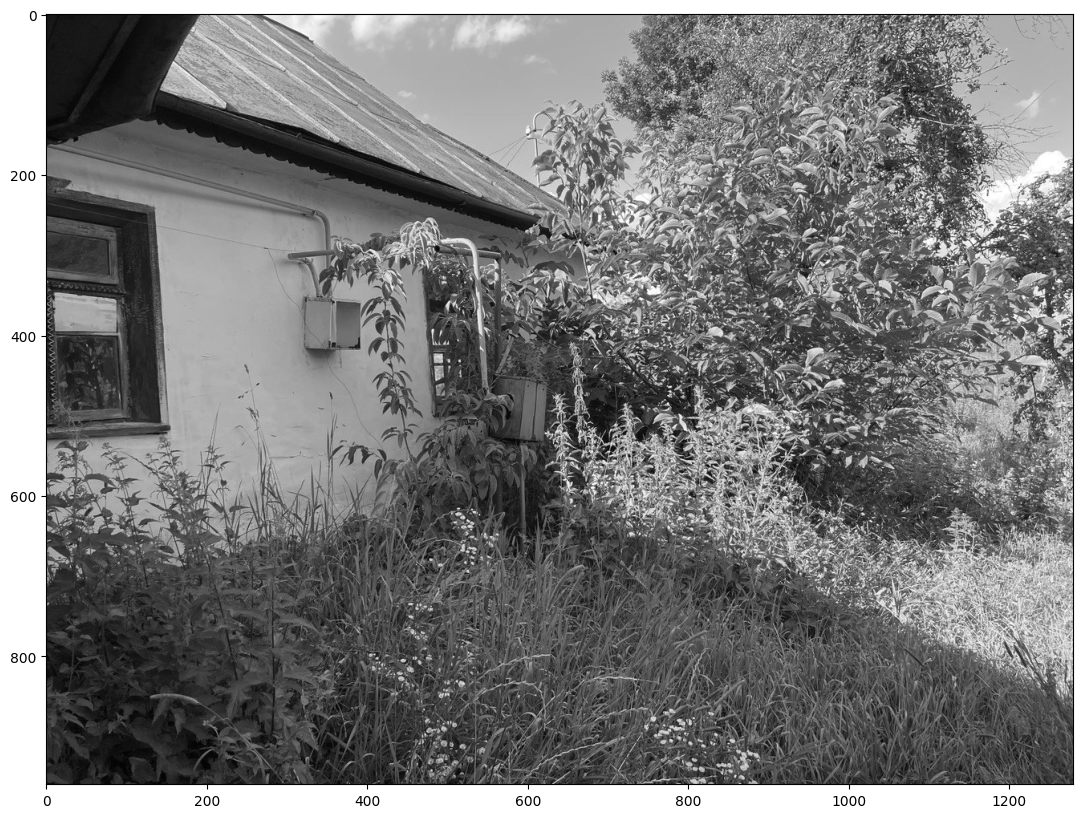

In [2]:
img = cv2.imread('114.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap='gray')

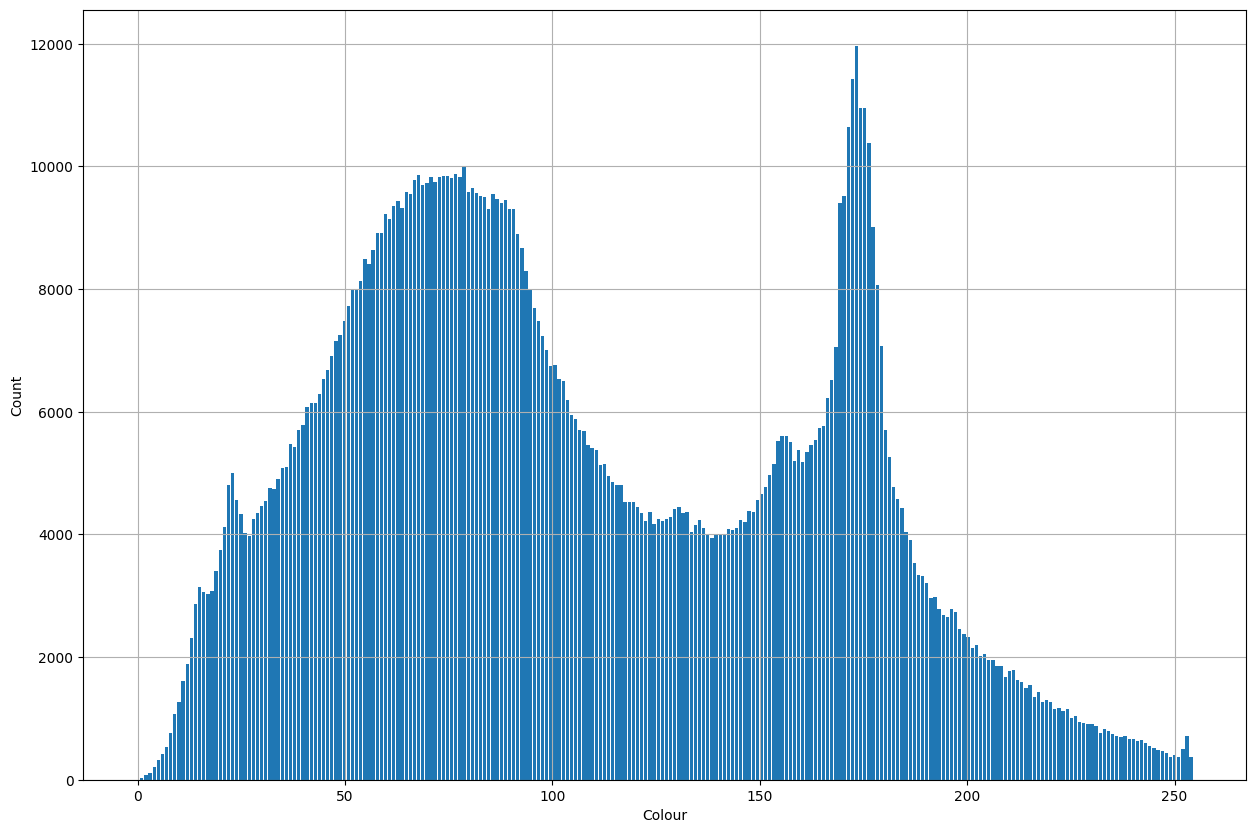

In [3]:
h = np.histogram(img, 256)
plt.bar(h[1][0:-1], h[0])
plt.xlabel('Colour'), plt.ylabel('Count')
plt.grid(True)

In [8]:
import cv2
import numpy as np

# Read the image
img = cv2.imread('114.jpg')
# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Get image dimensions
rows, cols = gray.shape

# Compute the total amount of image pixels
num_pixels = rows * cols

# Initializations
best_wcv = 1e6  # Best within-class variance (wcv)
opt_th = None   # Threshold corresponding to the best wcv

# Brute force search using all possible thresholds (levels of gray)
for th in range(0, 256):
    # Extract the image pixels corresponding to the foreground
    foreground = gray[gray > th]
    # Extract the image pixels corresponding to the background
    background = gray[gray <= th]

    # If foreground or background are empty, continue
    if len(foreground) == 0 or len(background) == 0:
        continue

    # Compute class-weights (omega parameters) for foreground and background
    omega_f = len(foreground) / num_pixels
    omega_b = len(background) / num_pixels

    # Compute pixel variance for foreground and background
    sigma2_f = np.var(foreground)
    sigma2_b = np.var(background)

    # Compute the within-class variance
    wcv = omega_f * sigma2_f + omega_b * sigma2_b

    # Perform the optimization
    if wcv < best_wcv:
        best_wcv = wcv
        opt_th = th

# Print out the optimal threshold found by Otsu algorithm
print('Optimal threshold:', opt_th)




Optimal threshold: 118


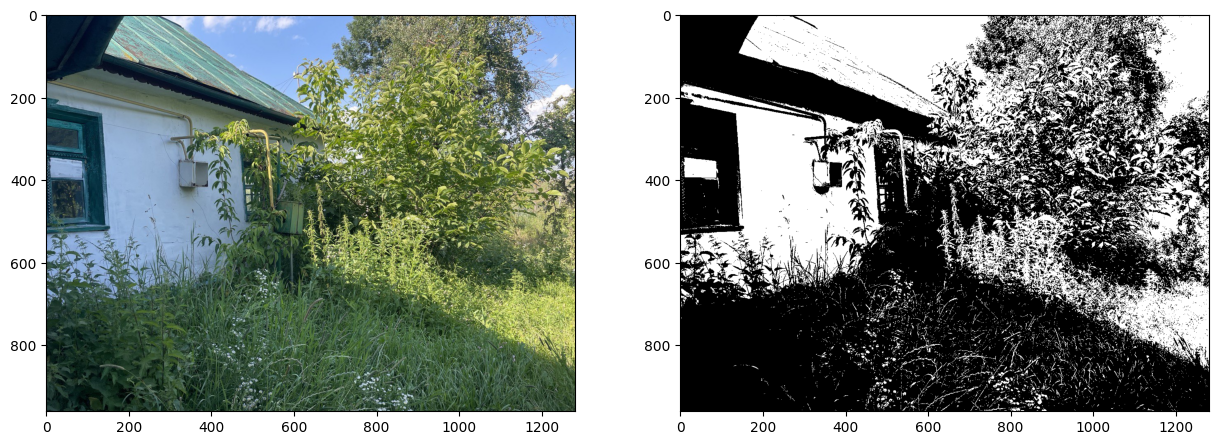

In [14]:
# Threshold the grayscale image
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
thresholded_img = (gray > opt_th).astype(np.uint8) * 255

# original image and its thresholded representation
plt.subplot(121), plt.imshow(img, cmap='gray')
plt.subplot(122), plt.imshow(thresholded_img, cmap='gray')
plt.show()
